In [1]:
%pwd

'c:\\Project\\iNeuron-DS-Assessment\\ML\\notebook'

In [4]:
import os
os.chdir("../")

In [5]:
%pwd

'c:\\Project\\iNeuron-DS-Assessment'

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveRegressor

In [51]:
import os
import pandas as pd

file_path = 'ML/notebook/data/instagram_reach.csv'

if os.path.exists(file_path):
    data = pd.read_csv(file_path)
else:
    print(f"File '{file_path}' does not exist.")


In [52]:
data.head()

,Unnamed: 0,S.No,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes
0,0,1,mikequindazzi,Who are #DataScientist and what do they do? >>...,1600,#MachineLearning #AI #DataAnalytics #DataScien...,11 hours,139
1,1,2,drgorillapaints,We all know where it’s going. We just have to ...,880,#deck .#mac #macintosh#sayhello #apple #steve...,2 hours,23
2,2,3,aitrading_official,Alexander Barinov: 4 years as CFO in multinati...,255,#whoiswho #aitrading #ai #aitradingteam#instat...,2 hours,25
3,3,4,opensourcedworkplace,sfad,340,#iot #cre#workplace #CDO #bigdata #technology#...,3 hours,49
4,4,5,crea.vision,Ever missed a call while your phone was chargi...,304,#instamachinelearning #instabigdata#instamarke...,3 hours,30


In [53]:
data.isnull().sum()

Unnamed: 0           0
S.No                 0
USERNAME             0
Caption              6
Followers            0
Hashtags             0
Time since posted    0
Likes                0
dtype: int64

In [54]:
data = data.dropna()

In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 94 entries, 0 to 99
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         94 non-null     int64 
 1   S.No               94 non-null     int64 
 2   USERNAME           94 non-null     object
 3   Caption            94 non-null     object
 4   Followers          94 non-null     int64 
 5   Hashtags           94 non-null     object
 6   Time since posted  94 non-null     object
 7   Likes              94 non-null     int64 
dtypes: int64(4), object(4)
memory usage: 6.6+ KB


In [56]:
data.shape

(94, 8)

In [57]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,94.0,9.000000,6.771223,0.0,4.0,8.0,12.75,26.0
S.No,94.0,16.117021,7.481671,1.0,10.0,16.0,22.00,30.0
Followers,94.0,942.627660,1023.894946,11.0,231.0,593.5,1177.00,4496.0
Likes,94.0,47.882979,56.501757,8.0,19.0,29.5,46.00,349.0


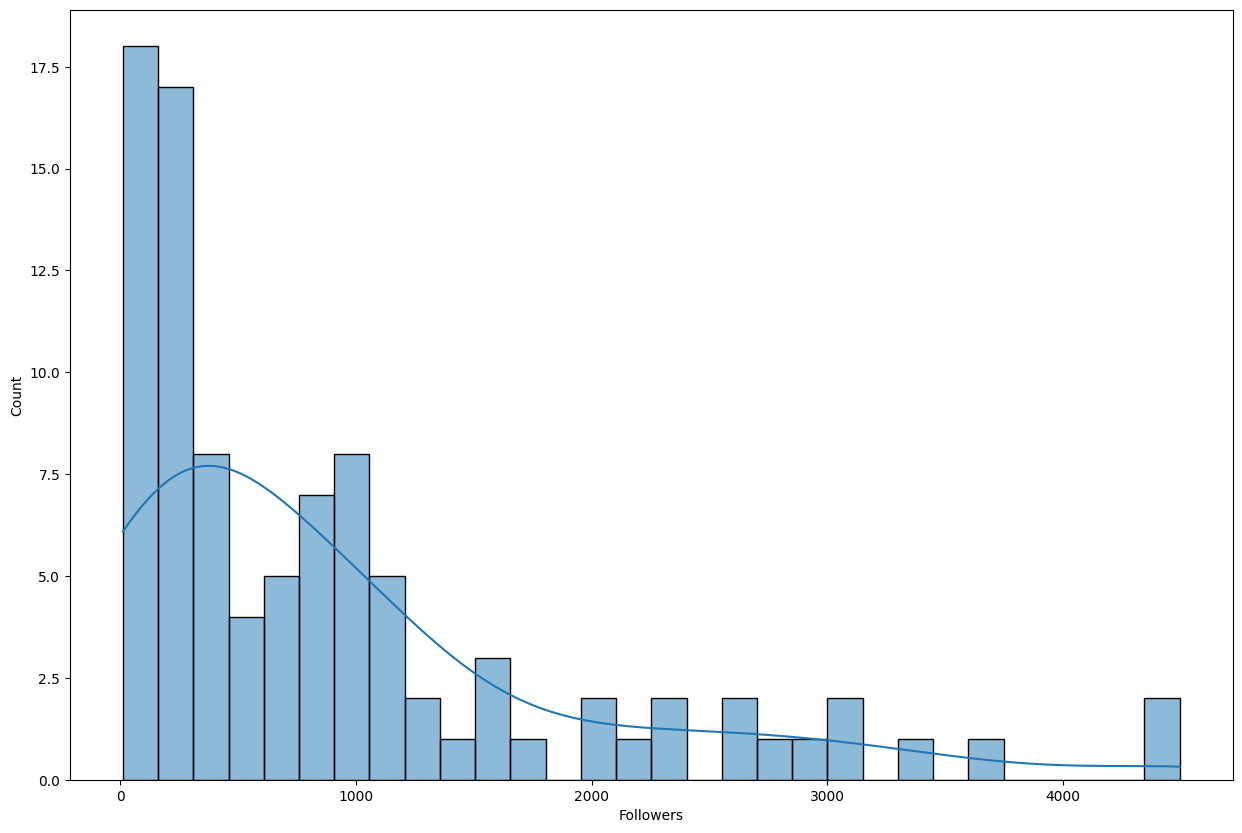

In [14]:
plt.figure(figsize=(15,10))
sns.histplot(data=data, x='Followers', bins=30, kde=True)
plt.show()

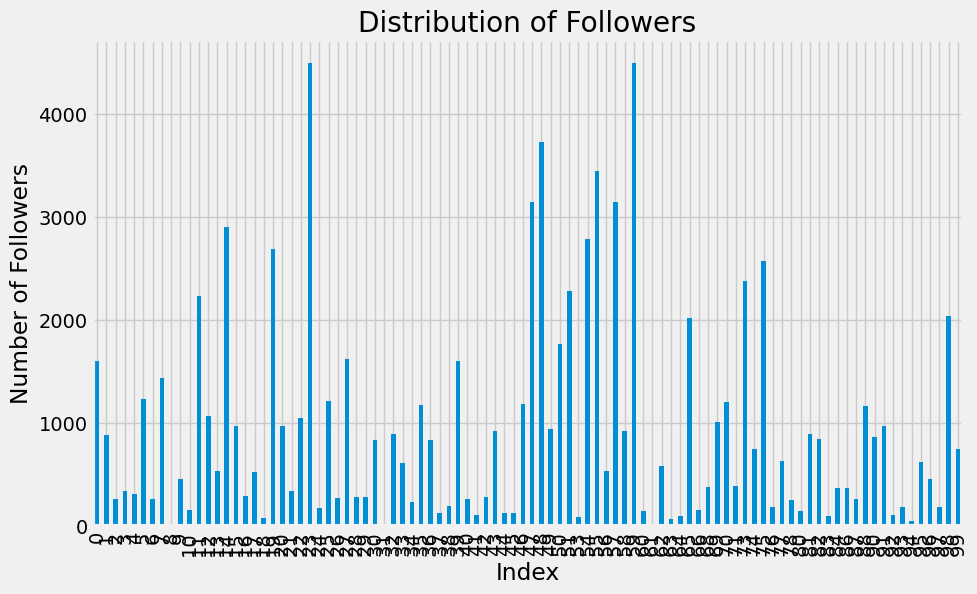

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
data['Followers'].plot(kind='bar')
plt.xlabel('Index')
plt.ylabel('Number of Followers')
plt.title('Distribution of Followers')
plt.show()


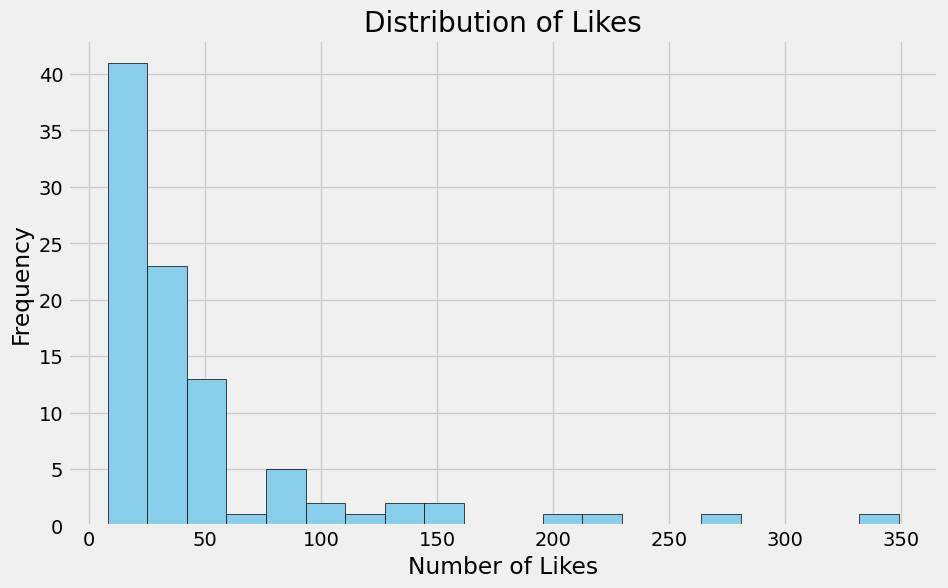

In [26]:
plt.figure(figsize=(10, 6))
plt.hist(data['Likes'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Number of Likes')
plt.ylabel('Frequency')
plt.title('Distribution of Likes')
plt.show()


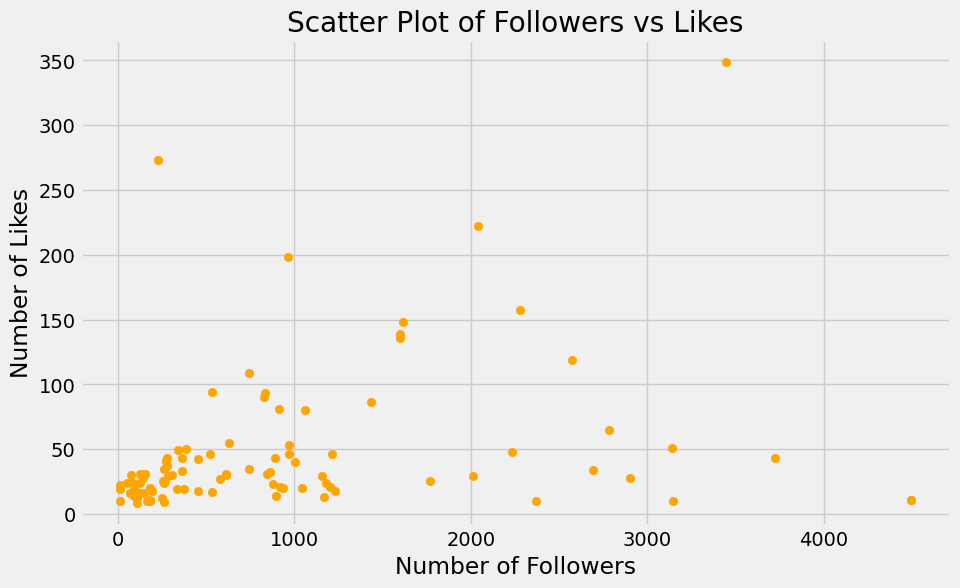

In [28]:
plt.figure(figsize=(10, 6))
plt.scatter(data['Followers'], data['Likes'], color='orange')
plt.xlabel('Number of Followers')
plt.ylabel('Number of Likes')
plt.title('Scatter Plot of Followers vs Likes')
plt.show()


In [32]:
categorical_cols = data.select_dtypes(include=['object']).columns.tolist()
numerical_cols = data.select_dtypes(exclude=['object']).columns.tolist()

print("Categorical Columns:")
print(categorical_cols)

print("\nNumerical Columns:")
print(numerical_cols)


Categorical Columns:
['USERNAME', 'Caption', 'Hashtags']

Numerical Columns:
['Unnamed: 0', 'S.No', 'Followers', 'Time since posted', 'Likes']


In [84]:
import pandas as pd
import numpy as np


missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)

missing_percentage = (missing_values / len(data)) * 100
missing_info = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
print("\nMissing Values Information:\n", missing_info)

numerical_cols = data.select_dtypes(exclude=['object']).columns.tolist()
data[numerical_cols] = data[numerical_cols].fillna(data[numerical_cols].median())

categorical_cols = data.select_dtypes(include=['object']).columns.tolist()
data[categorical_cols] = data[categorical_cols].fillna(data[categorical_cols].mode().iloc[0])

missing_values_after_imputation = data.isnull().sum()
print("\nMissing Values After Imputation:\n", missing_values_after_imputation)


Missing Values:
 Unnamed: 0           0
S.No                 0
USERNAME             0
Caption              0
Followers            0
Hashtags             0
Time since posted    0
Likes                0
dtype: int64

Missing Values Information:
                    Missing Values  Percentage
Unnamed: 0                      0         0.0
S.No                            0         0.0
USERNAME                        0         0.0
Caption                         0         0.0
Followers                       0         0.0
Hashtags                        0         0.0
Time since posted               0         0.0
Likes                           0         0.0

Missing Values After Imputation:
 Unnamed: 0           0
S.No                 0
USERNAME             0
Caption              0
Followers            0
Hashtags             0
Time since posted    0
Likes                0
dtype: int64


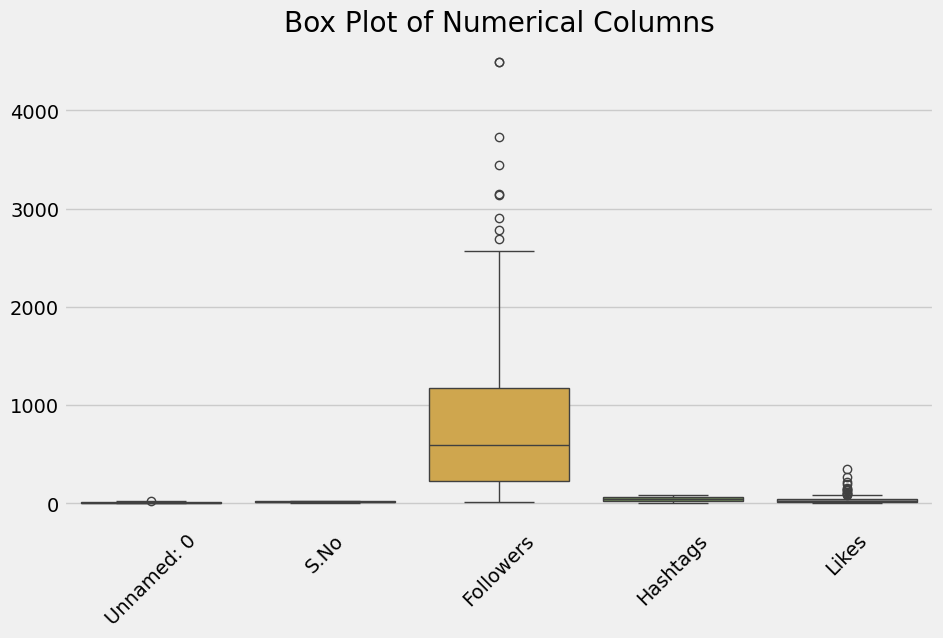

Outlier Counts:
 Unnamed: 0    0
S.No          0
Followers     2
Hashtags      0
Likes         3
dtype: int64


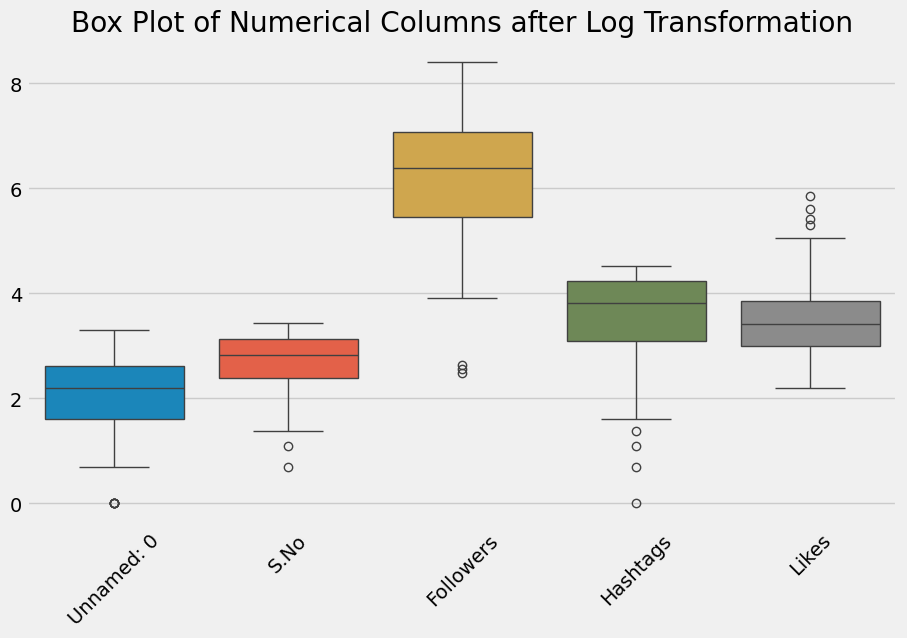

In [85]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore

plt.figure(figsize=(10, 6))
sns.boxplot(data=data[numerical_cols])
plt.title("Box Plot of Numerical Columns")
plt.xticks(rotation=45)
plt.show()

z_scores = pd.DataFrame(zscore(data[numerical_cols]), columns=numerical_cols)

outlier_threshold = 3

outliers = (z_scores > outlier_threshold) | (z_scores < -outlier_threshold)

outlier_counts = outliers.sum()
print("Outlier Counts:\n", outlier_counts)

data_no_outliers = data[~outliers.any(axis=1)]

data_log_transformed = data.copy()
data_log_transformed[numerical_cols] = np.log1p(data[numerical_cols])

plt.figure(figsize=(10, 6))
sns.boxplot(data=data_log_transformed[numerical_cols])
plt.title("Box Plot of Numerical Columns after Log Transformation")
plt.xticks(rotation=45)
plt.show()


In [91]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import skew

numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns.tolist()

scaler = MinMaxScaler()
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

skewed_cols = data[numerical_cols].apply(lambda x: skew(x))
skewed_cols = skewed_cols[skewed_cols > 0.5].index  
data[skewed_cols] = np.log1p(data[skewed_cols]) 

Updated Dataset after Data Transformation:
   Unnamed: 0      S.No              USERNAME  \
0    0.000000  0.000000         mikequindazzi   
1    0.037740  0.034483       drgorillapaints   
2    0.074108  0.068966    aitrading_official   
3    0.109199  0.103448  opensourcedworkplace   
4    0.143101  0.137931           crea.vision   

                                             Caption  Followers  Hashtags  \
0  Who are #DataScientist and what do they do? >>...   0.303279        14   
1  We all know where it’s going. We just have to ...   0.177105        91   
2  Alexander Barinov: 4 years as CFO in multinati...   0.052975        82   
3                                               sfad   0.070790        61   
4  Ever missed a call while your phone was chargi...   0.063284        60   

  Time since posted     Likes  USERNAME_Encoded  Caption_Encoded  \
0          11 hours  0.325097                61               86   
1           2 hours  0.043048                28               8

In [93]:
import pandas as pd
from scipy.stats import chi2_contingency, pearsonr

categorical_cols = data.select_dtypes(include=['object']).columns.tolist()

for col in categorical_cols:
    contingency_table = pd.crosstab(data[col], data['Likes'])
    chi2, p_value, _, _ = chi2_contingency(contingency_table)
    print(f"Chi-square test result for '{col}':")
    print(f"Chi-square statistic: {chi2}")
    print(f"P-value: {p_value}")
    print("")

numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns.tolist()

for col in numerical_cols:
    correlation, p_value = pearsonr(data[col], data['Likes'])
    print(f"Pearson correlation test result for '{col}':")
    print(f"Pearson correlation coefficient: {correlation}")
    print(f"P-value: {p_value}")
    print("")


Chi-square test result for 'USERNAME':
Chi-square statistic: 4844.916666666668
P-value: 0.3435945657815702

Chi-square test result for 'Caption':
Chi-square statistic: 5076.000000000001
P-value: 0.29337804421299885

Chi-square test result for 'Time since posted':
Chi-square statistic: 798.364465408805
P-value: 2.7557243325281295e-12

Pearson correlation test result for 'Unnamed: 0':
Pearson correlation coefficient: -0.0018535336710630854
P-value: 0.9858540555043317

Pearson correlation test result for 'S.No':
Pearson correlation coefficient: -0.004254050919702372
P-value: 0.9675407369537733

Pearson correlation test result for 'Followers':
Pearson correlation coefficient: 0.3026539333217385
P-value: 0.003027362751244281

Pearson correlation test result for 'Likes':
Pearson correlation coefficient: 0.9999999999999998
P-value: 0.0

Pearson correlation test result for 'Hashtags_Encoded':
Pearson correlation coefficient: 0.16775770205235546
P-value: 0.10605431768933955



In [106]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

X = data.drop('Likes', axis=1)
y = data['Likes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 0.005300767849477158


In [105]:

data['Time since posted'] = data['Time since posted'].str.split().str[0].astype(int)

print(data.head())


   Unnamed: 0      S.No  Followers  Hashtags  Time since posted     Likes  \
0    0.000000  0.000000   0.303279        14                 11  0.325097   
1    0.037740  0.034483   0.177105        91                  2  0.043048   
2    0.074108  0.068966   0.052975        82                  2  0.048651   
3    0.109199  0.103448   0.070790        61                  3  0.113538   
4    0.143101  0.137931   0.063284        60                  3  0.062520   

   USERNAME_Encoded  Caption_Encoded  Hashtags_Encoded  
0                61               86          0.153846  
1                28               82          1.000000  
2                 3               13          0.901099  
3                67               89          0.670330  
4                22               30          0.659341  


In [111]:
import numpy as np

features = np.array([
    [0.000000, 0.303279, 14, 11, 0.325097, 61, 86, 0.153846],
    [0.034483, 0.177105, 91, 2, 0.043048, 28, 82, 1.000000],
    [0.068966, 0.052975, 82, 2, 0.048651, 3, 13, 0.901099]
])

predicted_likes = model.predict(features)

print("Predicted Likes:")
for i, likes in enumerate(predicted_likes):
    print(f"Data point {i + 1}: {likes}")


Predicted Likes:
Data point 1: 0.17500947094109004
Data point 2: 0.10975996541575006
Data point 3: 0.09155803698550206


c:\Project\iNeuron-DS-Assessment\venv\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
